In [1]:
import os

from random_agent import RandomAgent

from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import numpy as np
from cnn_environment import CNN_Environment
current_path = os.getcwd()
parent_path = os.path.dirname(current_path)
data_path = os.path.join(current_path, "data/test")
env = CNN_Environment((224, 224), 15, data_path, render_mode = 'human', observation_type="full", wand=False)
env_prevois_actions = CNN_Environment((224, 224), 15, data_path, render_mode = 'human', observation_type="past_actions", wand=False)
env_heatmap = CNN_Environment((224, 224), 15, data_path, render_mode = 'human', observation_type="heatmap", wand=False)
random_agent = RandomAgent(env)

/Users/nicoberlaender/Development/ADLR/Reinforcement_Learning/cnn_environment.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.unet = torch.load("shape_completion_m

In [ ]:
num_episodes = 1000
losses_random = []
similarities_random = []
counter = 0

obs, info = env.reset()
episode_similarities_random = [info['current_similarity']]
episode_losses = [info['current_loss']]
while counter < num_episodes:
    # Get action from the model based on the current observation
    #action, _ = loaded_model.predict(obs, deterministic=False)
    action = random_agent.get_action()
    obs, reward, done, truncated, info = env.step(action)

    episode_similarities_random.append(info['current_similarity'])
    episode_losses.append(info['current_loss'])

    if done or truncated:
        counter += 1
        similarities_random.append(episode_similarities_random)
        losses_random.append(episode_losses)
        obs, info = env.reset()
        episode_similarities_random = [info['current_similarity']]
        episode_losses = [info['current_loss']]

print("All episodes completed. Exiting...")
print("Average similarity after 5 actions: ", np.mean([episode[5] for episode in similarities_random]))
print("Average loss after 5 actions: ", np.mean([episode[5] for episode in losses_random]))
print("Average similarity after 10 actions: ", np.mean([episode[10] for episode in similarities_random]))
print("Average loss after 10 actions: ", np.mean([episode[10] for episode in losses_random]))
print("Average similarity after 15 actions: ", np.mean([episode[15] for episode in similarities_random]))
print("Average loss after 15 actions: ", np.mean([episode[15] for episode in losses_random]))
env.close()



All episodes completed. Exiting...
Average similarity after 5 actions:  0.4506818353907883
Average loss after 5 actions:  0.10226844434812665
Average similarity after 10 actions:  0.570890406029265
Average loss after 10 actions:  0.06987890140060335
Average similarity after 15 actions:  0.6355579244569415
Average loss after 15 actions:  0.05565869934577495


In [ ]:
env1 = CNN_Environment((224, 224), 15, data_path, render_mode = 'human', observation_type="full", wand=False, random_perfect=True)
num_episodes = 1000
losses_random_perfect = []
similarities_random_perfect = []
counter = 0
random_agent = RandomAgent(env1)
obs, info = env1.reset()
episode_similarities_random_perfect = [info['current_similarity']]
episode_losses_perfect = [info['current_loss']]
while counter < num_episodes:
    # Get action from the model based on the current observation
    #action, _ = loaded_model.predict(obs, deterministic=False)
    patience = 0
    patience_broken = False
    while (info['ray_hit'] == False):
        action = random_agent.get_action()
        obs, reward, done, truncated, info = env1.step(action)
        patience += 1
        if patience > 25:
            patience_broken = True
            break
    if patience_broken:
        obs, info = env1.reset()
        episode_similarities_random_perfect = [info['current_similarity']]
        episode_losses_perfect = [info['current_loss']]
        continue
    info['ray_hit'] = False
    episode_similarities_random_perfect.append(info['current_similarity'])
    episode_losses_perfect.append(info['current_loss'])

    if done or truncated:
        counter += 1
        if counter % 100 == 0:
            print(counter)
        similarities_random_perfect.append(episode_similarities_random_perfect)
        losses_random_perfect.append(episode_losses_perfect)
        obs, info = env1.reset()
        episode_similarities_random_perfect = [info['current_similarity']]
        episode_losses_perfect = [info['current_loss']]

print("All episodes completed. Exiting...")
print("Average similarity after 5 actions: ", np.mean([episode[5] for episode in similarities_random_perfect]))
print("Average loss after 5 actions: ", np.mean([episode[5] for episode in losses_random_perfect]))
print("Average similarity after 10 actions: ", np.mean([episode[10] for episode in similarities_random_perfect]))
print("Average loss after 10 actions: ", np.mean([episode[10] for episode in losses_random_perfect]))
print("Average similarity after 15 actions: ", np.mean([episode[15] for episode in similarities_random_perfect]))
print("Average loss after 15 actions: ", np.mean([episode[15] for episode in losses_random_perfect]))

env1.close()

/Users/nicoberlaender/Development/ADLR/Reinforcement_Learning/cnn_environment.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.unet = torch.load("shape_completion_m

100
200
300
400
500
All episodes completed. Exiting...
[0, 0.4454600850423765, 0.5948406672269797, 0.7559377553186423, 0.7191455690513088, 0.7065302905534773, 0.6848899007707745, 0.7033132524824448, 0.7303543908086637, 0.7349304476546132, 0.8108747038527385, 0.8069230763023668, 0.8095605236626364, 0.8288431055238961, 0.8320063687643261, 0.8981042646934405]
Average similarity after 5 actions:  0.6289740677819411
Average loss after 5 actions:  0.06340221407776699
Average similarity after 10 actions:  0.7532978964686415
Average loss after 10 actions:  0.042598214334342625
Average similarity after 15 actions:  0.7964810530981465
Average loss after 15 actions:  0.0349274126177188


In [ ]:
# Run ID
model_id1 = "200kJaccard1e-3PreviousActions.zip" 

# Model path
model_path = f"models/{model_id1}"

# Load the model
loaded_model1 = PPO.load(model_path)

num_episodes = 1000
losses_ppo1 = []
similarities_ppo1 = []
counter = 0

obs, info = env_prevois_actions.reset()
episode_similarities1 = [info['current_similarity']]
episode_losses1 = [info['current_loss']]
while counter < num_episodes:
    # Get action from the model based on the current observation
    action, _ = loaded_model1.predict(obs, deterministic=False)
    obs, reward, done, truncated, info = env_prevois_actions.step(action)

    episode_similarities1.append(info['current_similarity'])
    episode_losses1.append(info['current_loss'])

    if done or truncated:
        counter += 1
        similarities_ppo1.append(episode_similarities1)
        losses_ppo1.append(episode_losses1)
        obs, info = env_prevois_actions.reset()
        episode_similarities1 = [info['current_similarity']]
        episode_losses1 = [info['current_loss']]

print("All episodes completed. Exiting...")
print("Average similarity after 5 actions: ", np.mean([episode[5] for episode in similarities_ppo1]))
print("Average loss after 5 actions: ", np.mean([episode[5] for episode in losses_ppo1]))
print("Average similarity after 10 actions: ", np.mean([episode[10] for episode in similarities_ppo1]))
print("Average loss after 10 actions: ", np.mean([episode[10] for episode in losses_ppo1]))
print("Average similarity after 15 actions: ", np.mean([episode[15] for episode in similarities_ppo1]))
print("Average loss after 15 actions: ", np.mean([episode[15] for episode in losses_ppo1]))

env_prevois_actions.close()

All episodes completed. Exiting...
Average similarity after 5 actions:  0.5861432774252
Average loss after 5 actions:  0.07321955033298581
Average similarity after 10 actions:  0.6960775636043043
Average loss after 10 actions:  0.05085823163785972
Average similarity after 15 actions:  0.7335962128063834
Average loss after 15 actions:  0.04301012110617012


In [ ]:
model_id = "ppo200kJaccard1e-3.zip" 

# Model path
model_path = f"models/{model_id}"

# Load the model
loaded_model = PPO.load(model_path)

num_episodes = 1000
losses_ppo = []
similarities_ppo = []
counter = 0

obs, info = env.reset()
episode_similarities = [info['current_similarity']]
episode_losses = [info['current_loss']]
while counter < num_episodes:
    # Get action from the model based on the current observation
    action, _ = loaded_model.predict(obs)
    obs, reward, done, truncated, info = env.step(action)

    episode_similarities.append(info['current_similarity'])
    episode_losses.append(info['current_loss'])

    if done or truncated:
        counter += 1
        similarities_ppo.append(episode_similarities)
        losses_ppo.append(episode_losses)
        obs, info = env.reset()
        episode_similarities = [info['current_similarity']]
        episode_losses = [info['current_loss']]

print("All episodes completed. Exiting...")
print("Average similarity after 5 actions: ", np.mean([episode[5] for episode in similarities_ppo]))
print("Average loss after 5 actions: ", np.mean([episode[5] for episode in losses_ppo]))
print("Average similarity after 10 actions: ", np.mean([episode[10] for episode in similarities_ppo]))
print("Average loss after 10 actions: ", np.mean([episode[10] for episode in losses_ppo]))
print("Average similarity after 15 actions: ", np.mean([episode[15] for episode in similarities_ppo]))
print("Average loss after 15 actions: ", np.mean([episode[15] for episode in losses_ppo]))

env.close()

All episodes completed. Exiting...
Average similarity after 5 actions:  0.5947654529507136
Average loss after 5 actions:  0.06869991778582335
Average similarity after 10 actions:  0.7296432819973588
Average loss after 10 actions:  0.04188663190230727
Average similarity after 15 actions:  0.7414000545590006
Average loss after 15 actions:  0.0395355895892717


In [ ]:
model_id = "200kJaccard1e-3Heatmap.zip" 

# Model path
model_path = f"models/{model_id}"

# Load the model
loaded_model = PPO.load(model_path)

num_episodes = 1000
losses_ppo2 = []
similarities_ppo2 = []
counter = 0

obs, info = env_heatmap.reset()
episode_similarities = [info['current_similarity']]
episode_losses = [info['current_loss']]
while counter < num_episodes:
    # Get action from the model based on the current observation
    action, _ = loaded_model.predict(obs)
    obs, reward, done, truncated, info = env_heatmap.step(action)

    episode_similarities.append(info['current_similarity'])
    episode_losses.append(info['current_loss'])

    if done or truncated:
        counter += 1
        similarities_ppo2.append(episode_similarities)
        losses_ppo2.append(episode_losses)
        obs, info = env_heatmap.reset()
        episode_similarities = [info['current_similarity']]
        episode_losses = [info['current_loss']]

print("All episodes completed. Exiting...")
print("Average similarity after 5 actions: ", np.mean([episode[5] for episode in similarities_ppo2]))
print("Average loss after 5 actions: ", np.mean([episode[5] for episode in losses_ppo2]))
print("Average similarity after 10 actions: ", np.mean([episode[10] for episode in similarities_ppo2]))
print("Average loss after 10 actions: ", np.mean([episode[10] for episode in losses_ppo2]))
print("Average similarity after 15 actions: ", np.mean([episode[15] for episode in similarities_ppo2]))
print("Average loss after 15 actions: ", np.mean([episode[15] for episode in losses_ppo2]))

env_heatmap.close()

All episodes completed. Exiting...
Average similarity after 5 actions:  0.38397980305801344
Average loss after 5 actions:  0.10723756195791066
Average similarity after 10 actions:  0.32394537156309205
Average loss after 10 actions:  0.130550349813886
Average similarity after 15 actions:  0.2857728828647128
Average loss after 15 actions:  0.17524195104185492


(16,)


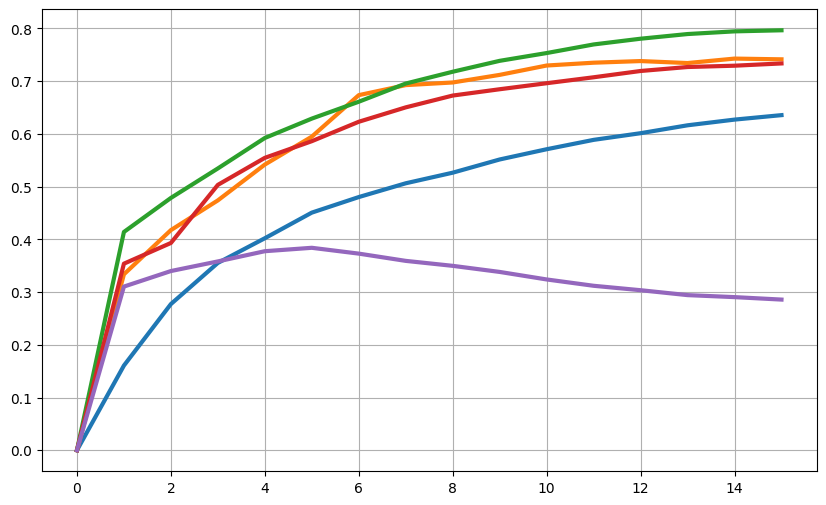

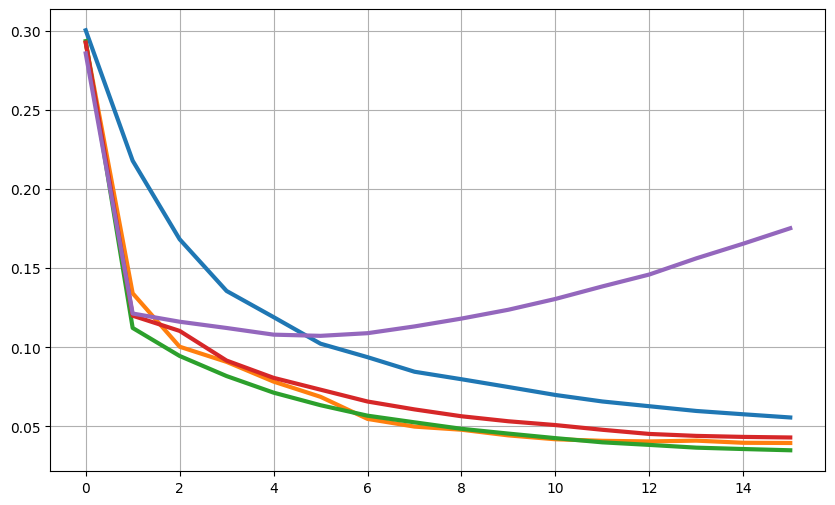

In [39]:
#print(len(similarities_random_perfect))
#print(len(similarities_random))
average_similarities_random = np.nanmean(similarities_random, axis=0)
average_similarities_random_perfect = np.nanmean(similarities_random_perfect, axis=0)
average_similarities_ppo = np.nanmean(similarities_ppo, axis=0)
average_similarities_ppo1 = np.nanmean(similarities_ppo1, axis=0)
average_similarities_ppo2 = np.nanmean(similarities_ppo2, axis=0)
# Create timestep array
timesteps = range(len(average_similarities_random))
#print(average_similarities_random_perfect.shape)
print(average_similarities_random.shape)
# Plot
plt.figure(figsize=(10, 6))
#increase line width
plt.plot(timesteps, average_similarities_random, linewidth=3)
plt.plot(timesteps, average_similarities_ppo, linewidth=3)
plt.plot(timesteps, average_similarities_random_perfect, linewidth=3)
plt.plot(timesteps, average_similarities_ppo1, linewidth=3)
plt.plot(timesteps, average_similarities_ppo2, linewidth=3)
plt.grid(True)
plt.show()

# Similar process for losses
average_losses_random = np.nanmean(losses_random, axis=0)
average_losses_ppo = np.nanmean(losses_ppo, axis=0)
average_losses_random_perfect = np.nanmean(losses_random_perfect, axis=0)
average_losses_ppo1 = np.nanmean(losses_ppo1, axis=0)
average_losses_ppo2 = np.nanmean(losses_ppo2, axis=0)

# Plot losses
plt.figure(figsize=(10, 6))
plt.plot(timesteps, average_losses_random, linewidth=3)
plt.plot(timesteps, average_losses_ppo, linewidth=3)
plt.plot(timesteps, average_losses_random_perfect, linewidth=3)
plt.plot(timesteps, average_losses_ppo1, linewidth=3)
plt.plot(timesteps, average_losses_ppo2, linewidth=3)
plt.grid(True)
plt.show()

/Users/nicoberlaender/Development/ADLR/.conda/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
/Users/nicoberlaender/Development/ADLR/.conda/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(


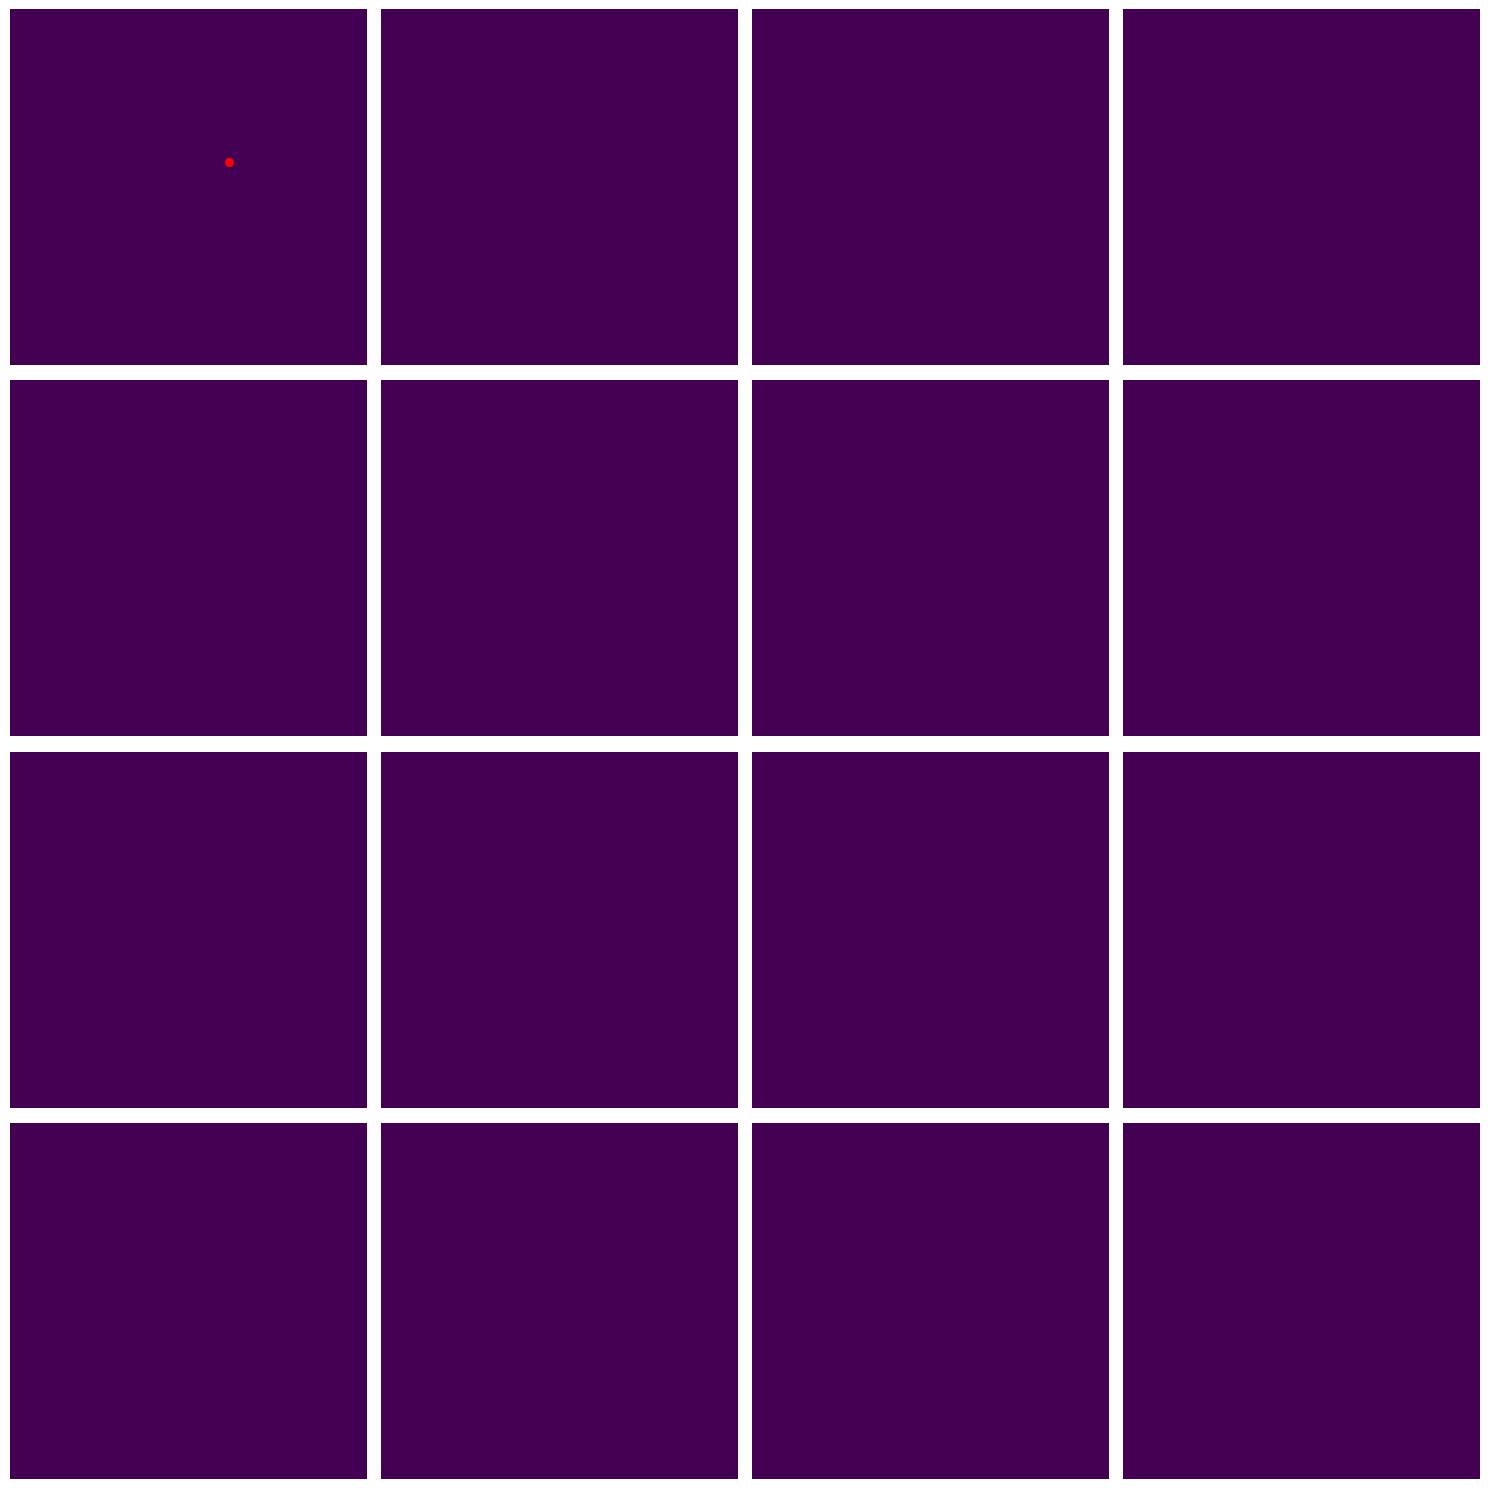

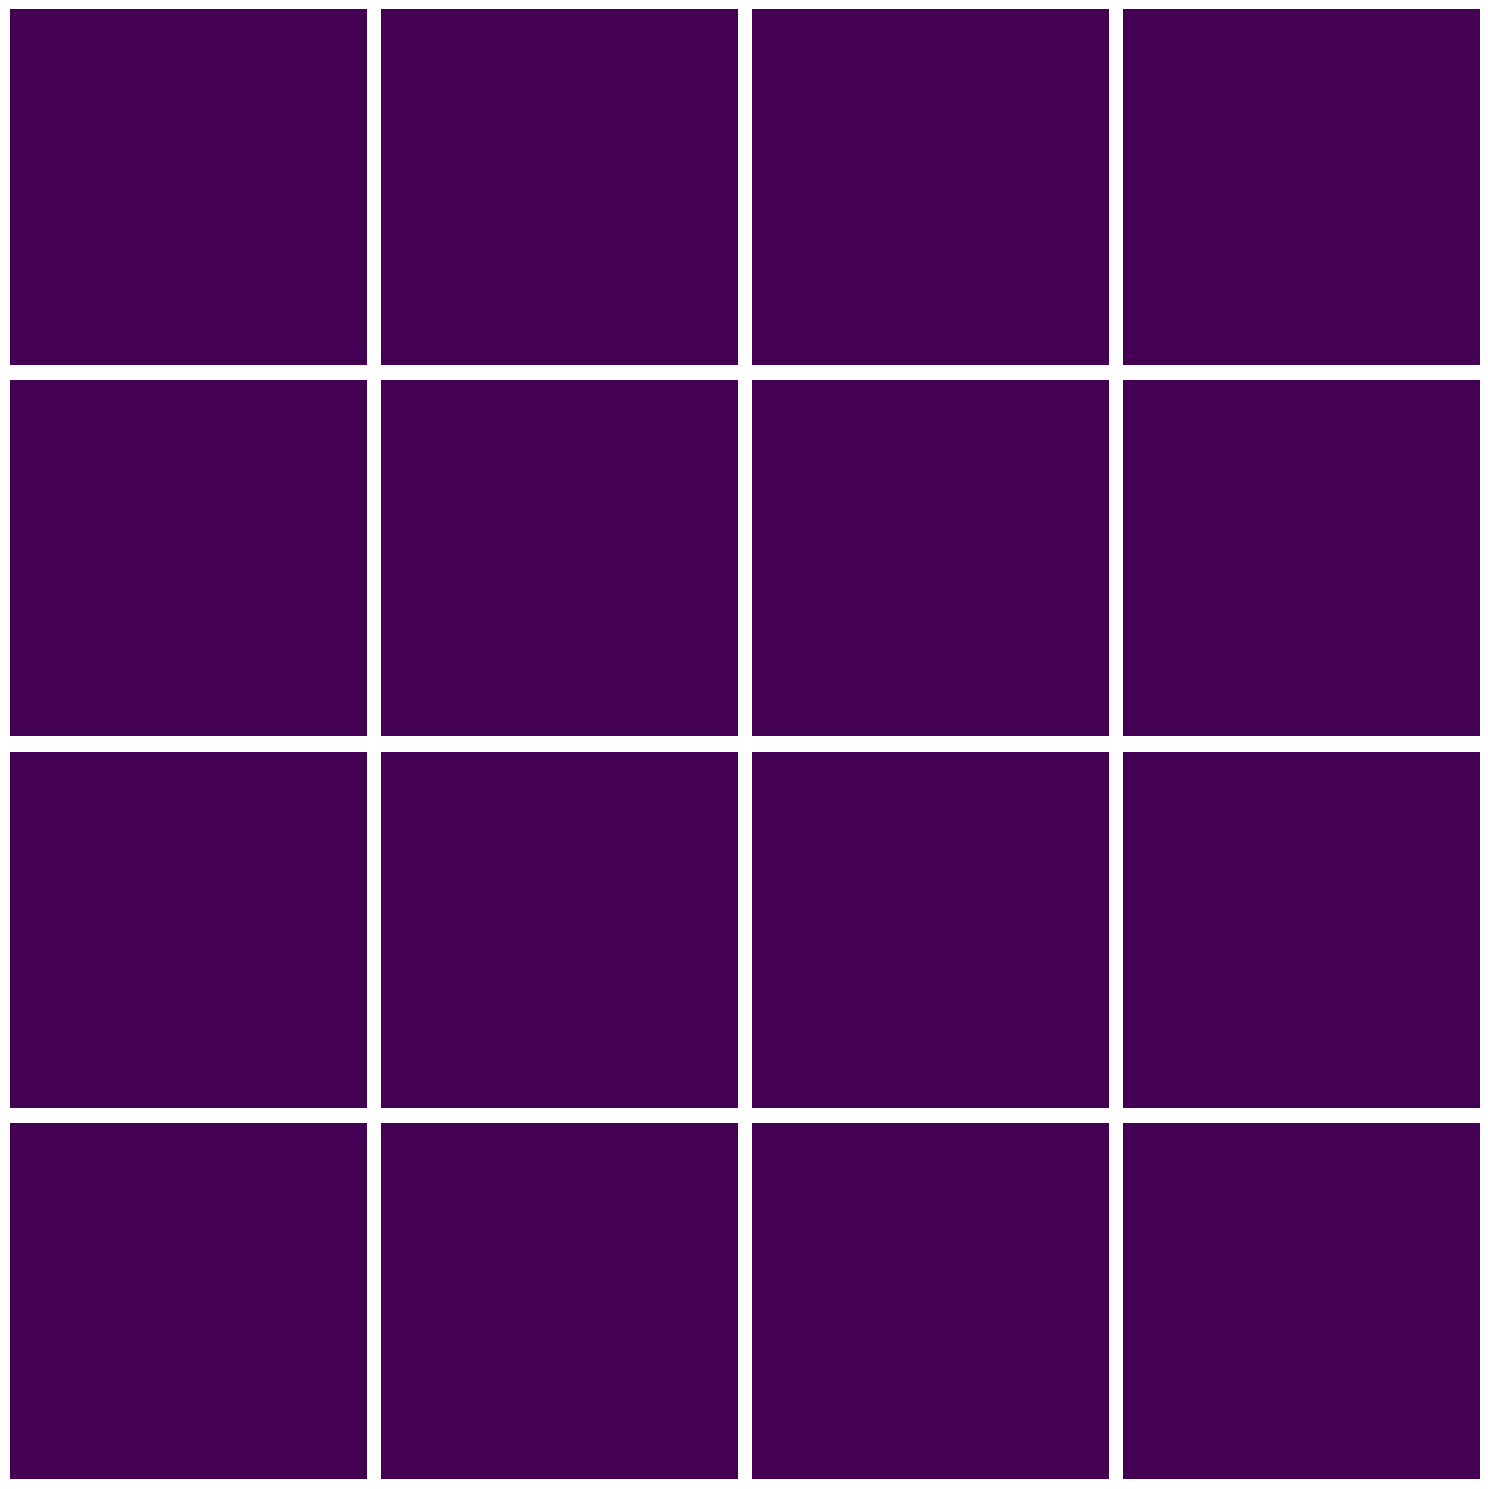

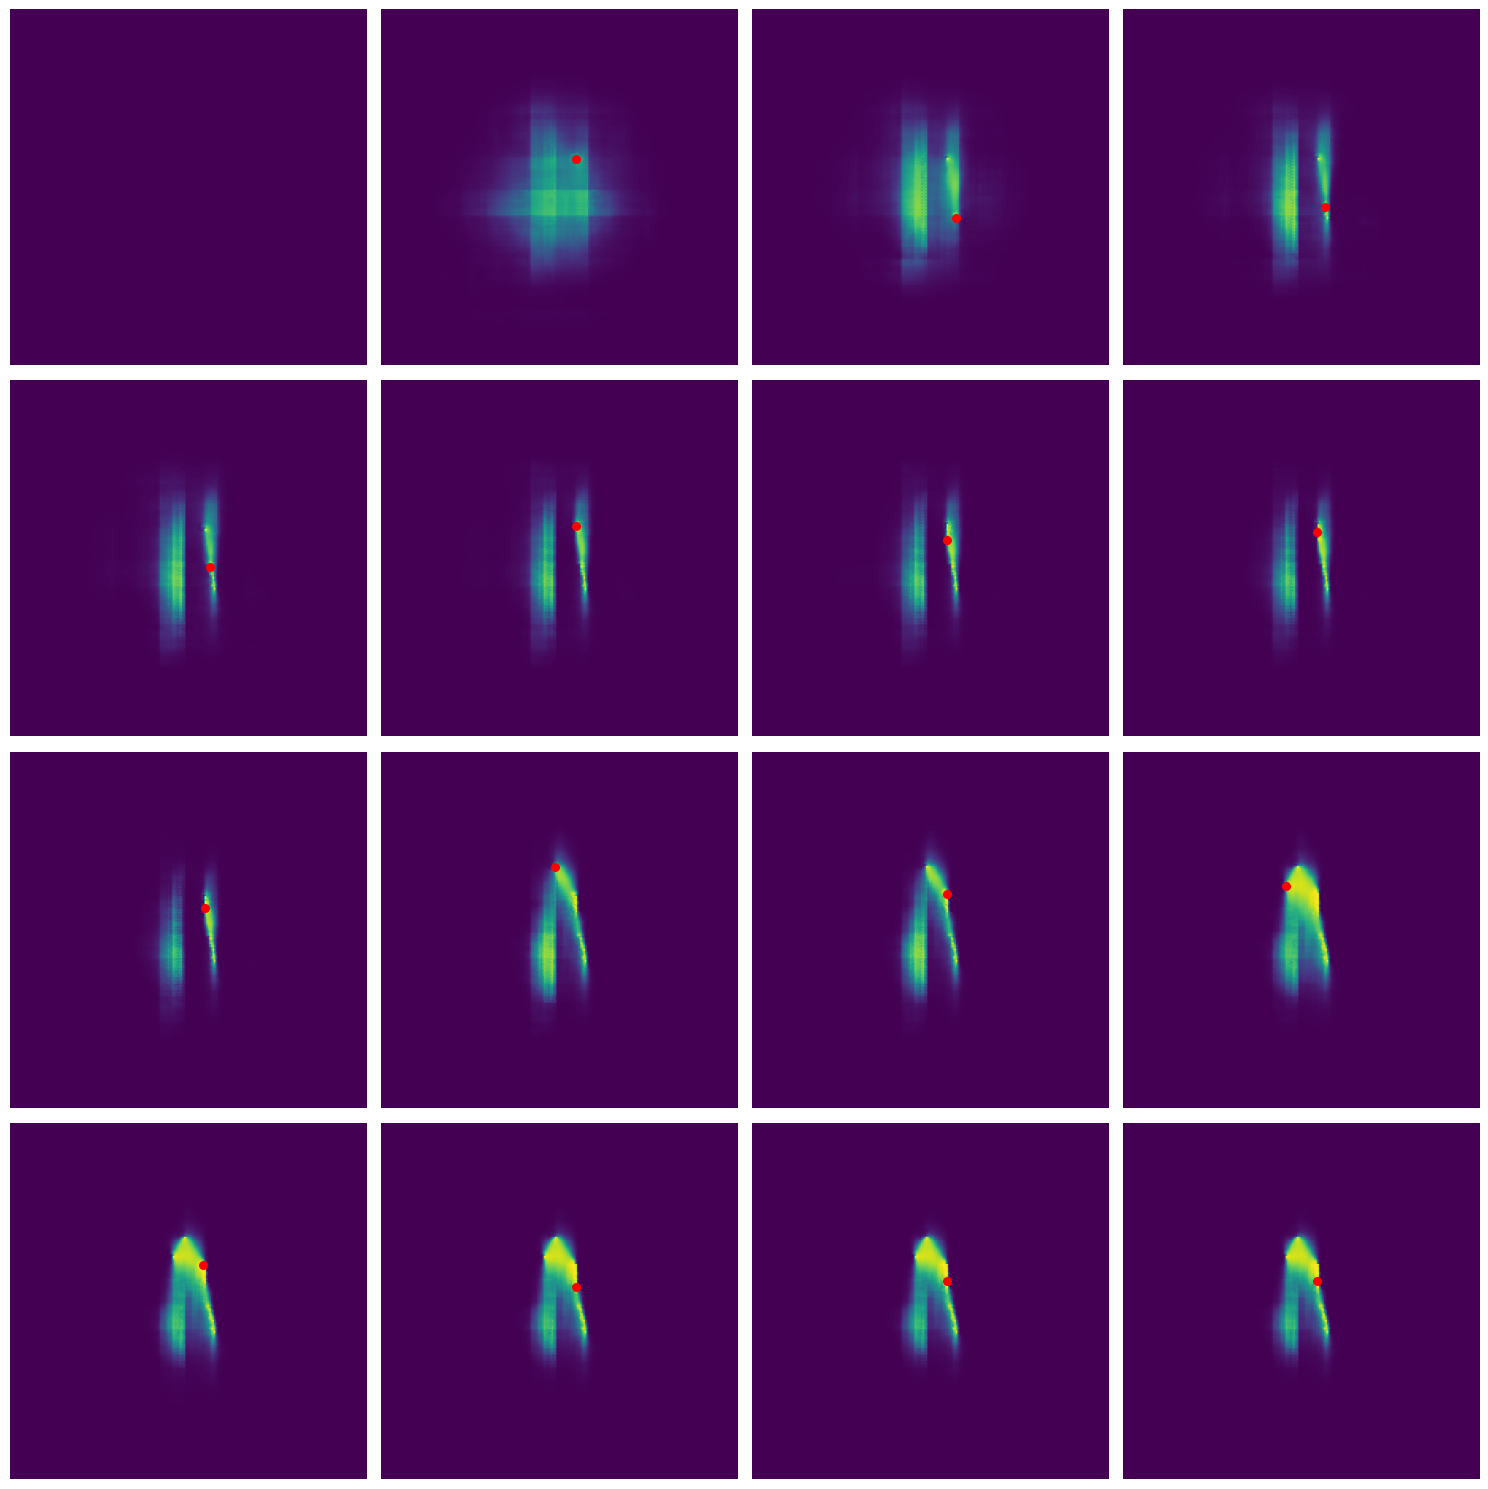

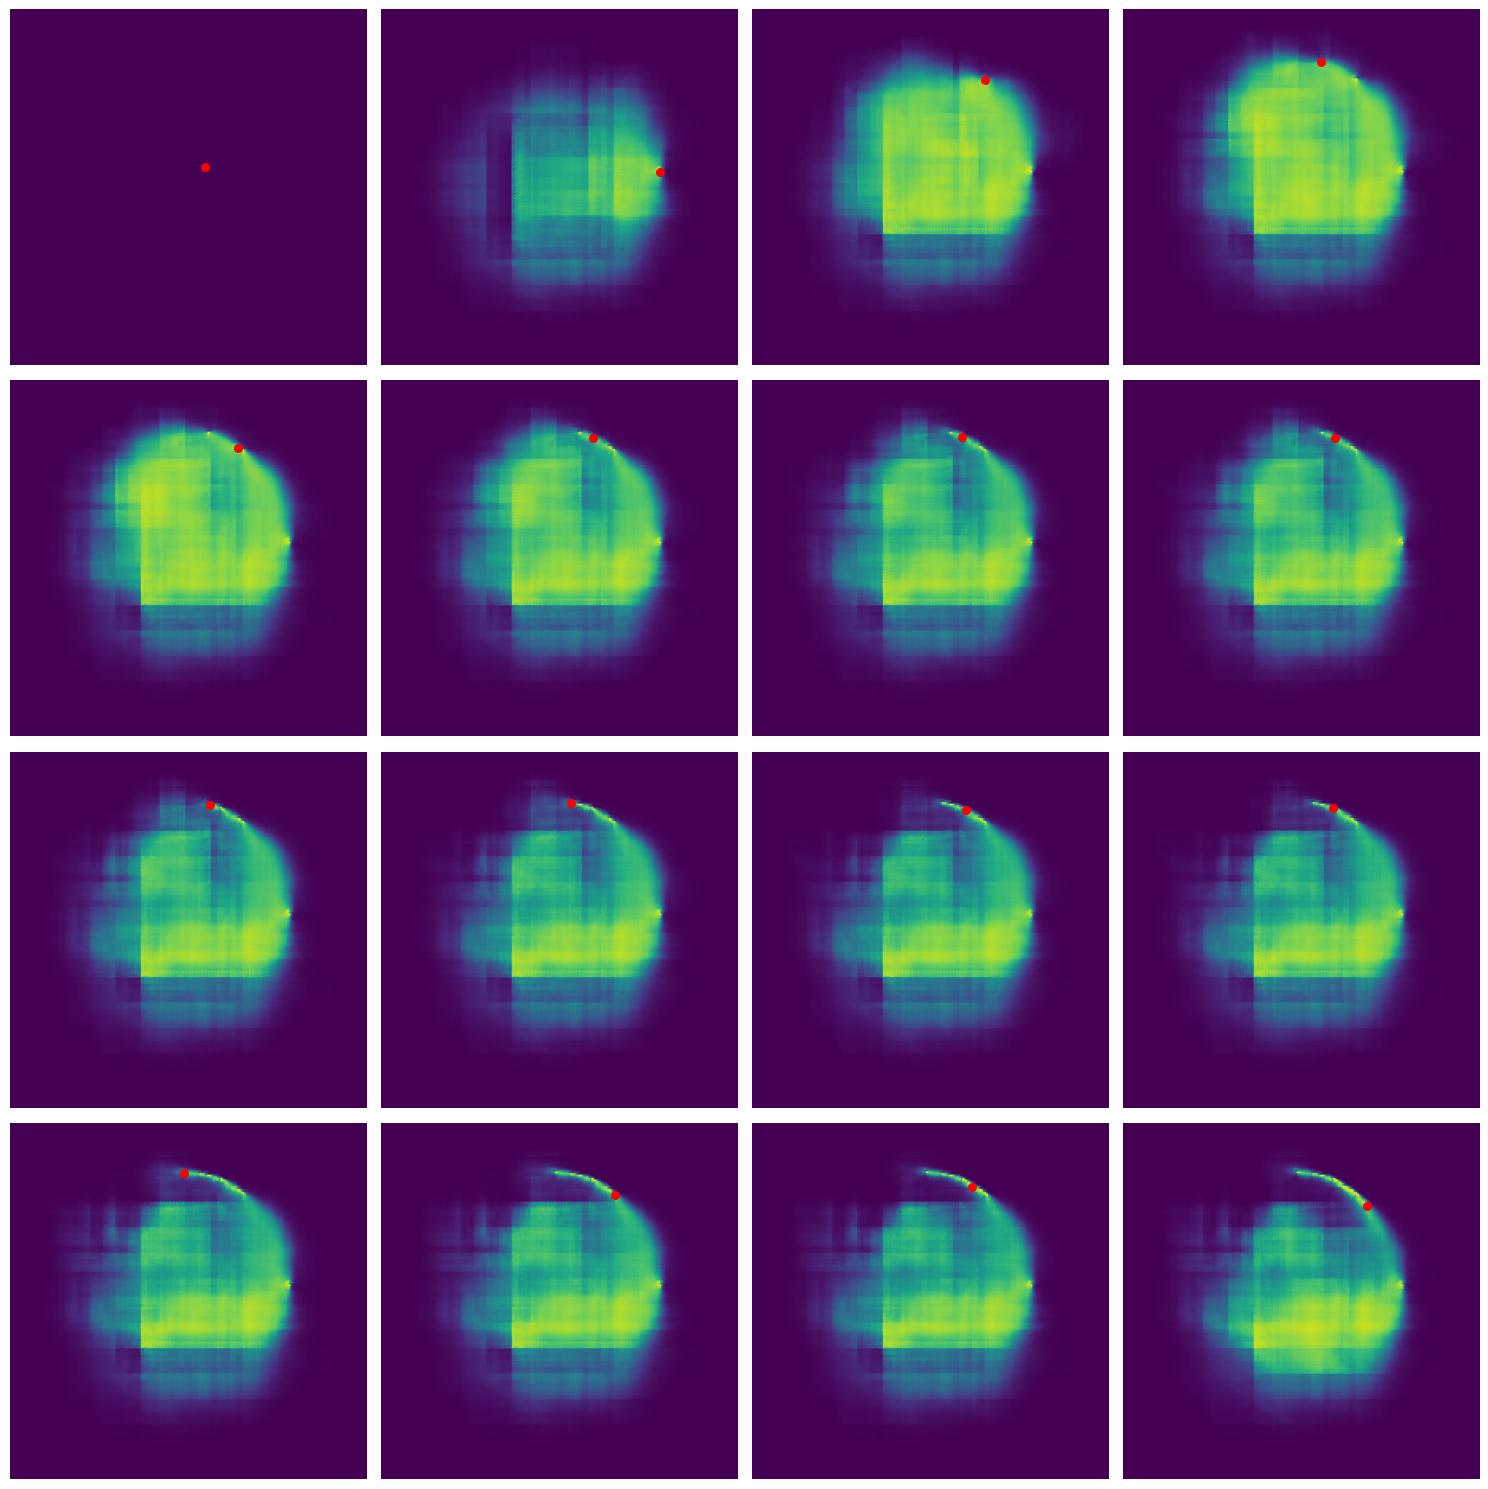

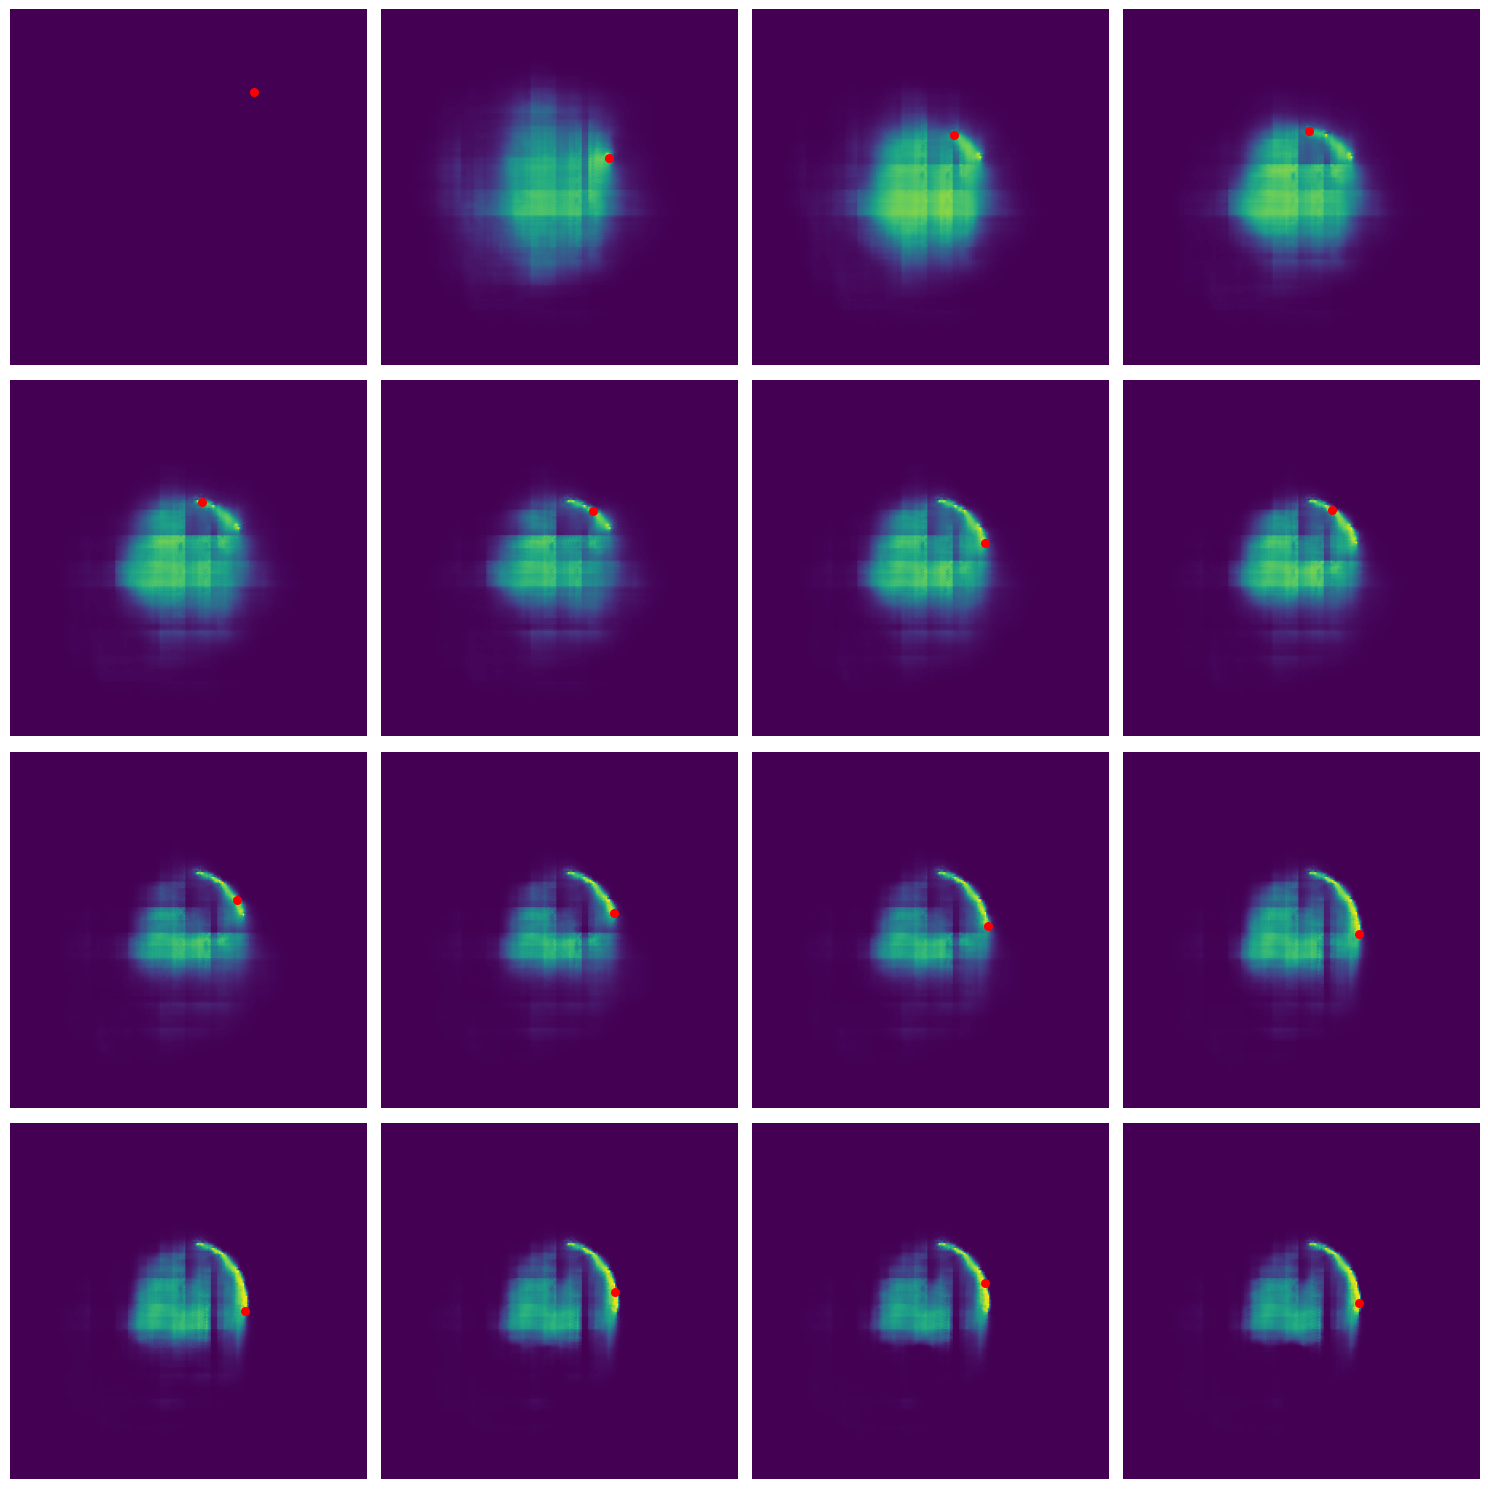

All episodes completed. Exiting...


In [28]:
num_episodes = 5  # Increased number of episodes
losses = []
similarities = []
counter = 0

model_id = "200kJaccard1e-3Heatmap.zip" 

# Model path
model_path = f"models/{model_id}"

# Load the model
loaded_model = PPO.load(model_path)

env = env_heatmap

obs, info = env.reset()

while counter < num_episodes:
    episode_images = [obs.squeeze()]  # Store images for current episode
    episode_similarities = [info['current_similarity']]
    episode_losses = [info['current_loss']]
    episode_hit_points = [info['hit_point']]
    
    while True:
        #action = random_agent.get_action()
        action, _ = loaded_model.predict(obs)
        obs, reward, done, truncated, info = env.step(action)
        hit_point = info['hit_point']
        
        episode_images.append(obs.squeeze())
        episode_similarities.append(info['current_similarity'])
        episode_losses.append(info['current_loss'])
        episode_hit_points.append(hit_point)

        
        if done or truncated:
            break
    
    # After each episode, plot the images and store metrics
    counter += 1
    similarities.append(episode_similarities)
    losses.append(episode_losses)
    
    # Create a grid plot for the current episode
    num_images = len(episode_images)
    n_cols = 4
    n_rows = (num_images + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(episode_images[i])
        hit_point = episode_hit_points[i]
        plt.scatter(hit_point[1], hit_point[0], c='r', s=30)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Start next episode
    if counter < num_episodes:
        obs, info = env.reset()

print("All episodes completed. Exiting...")
env.close()